In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import weak_sauce as ws
import weak_sauce.data_tools
from weak_sauce.grid import MoveableGrid
import weak_sauce.shifted_cmap
from astropy.io import fits

In [2]:
data_mg = MoveableGrid('/nfs/slac/g/ki/ki19/lsst/mbaumer/ccd_mg_model_fits/lsst_amp03_maxit100000_step0.1_decay0.0/best_mg.pkl') 
full_amp_img = np.load('../data/lsst_ultraflat_75ke_amp3.npy')
full_amp_img = full_amp_img[100:-100,100:-100]

fitted = ws.data_tools.fitIlluminationVariation(full_amp_img)
data_rel_flux_map = (full_amp_img-fitted)/fitted+1

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


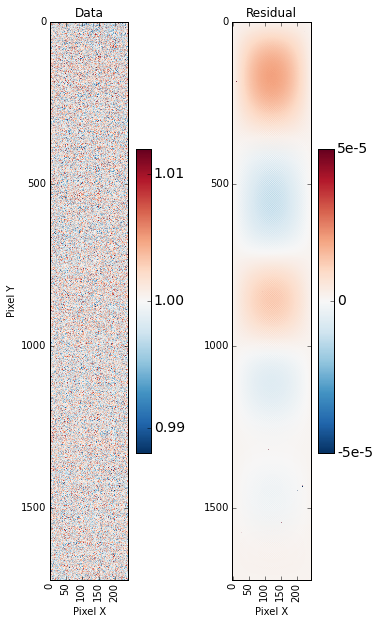

In [3]:
fig,axs = plt.subplots(1,2,figsize=(6,10),sharey=False,sharex=False)

plt.sca(axs[0])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Data')

im = axs[0].imshow(data_rel_flux_map,vmin=.988,vmax=1.012,cmap=plt.cm.RdBu_r)
cbar = plt.colorbar(im,ax=axs[0],ticks=[.99,1,1.01],fraction=0.1)
cbar.ax.tick_params(labelsize=14) 
axs[0].set_ylabel('Pixel Y')
axs[0].set_xlabel('Pixel X')
axs[1].set_xlabel('Pixel X')

plt.sca(axs[1])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Residual')

im = axs[1].imshow((data_rel_flux_map-data_mg.source.fluxes.T)/data_rel_flux_map,vmin=-0.00005,vmax=0.00005,cmap=plt.cm.RdBu_r)
cbar = plt.colorbar(im,ax=axs[1],ticks=[-0.00005,0,0.00005],fraction=0.1)
cbar.set_ticklabels(['-5e-5','0','5e-5'])
cbar.ax.tick_params(labelsize=14) 
plt.savefig('figure9.eps', format='eps', dpi=300)

In [ ]:
#had to revert to previous illumination correction to match that used in intial fit that was so good!

0.99852000085000225

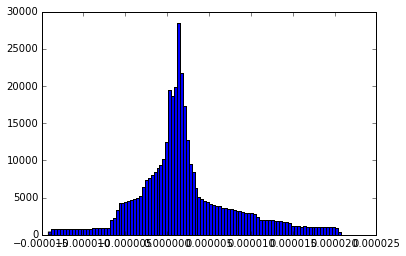

In [19]:
resid = (data_rel_flux_map-data_mg.source.fluxes.T)/data_rel_flux_map
masked = np.ma.masked_where(np.abs(resid)>0.01,resid)
plt.hist(masked.compressed(),bins=100)
(0.004-np.std(masked))/0.004

In [20]:
np.std(masked)

5.9199965999913226e-06

In [22]:
6e-4/.4

0.0014999999999999998

In [22]:
np.std(data_rel_flux_map)

0.003885938430828718